# カルバック-ライブラー ダイバージェンス

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## カルバック-ライブラー ダイバージェンス(Kullback-Leibler  divergence, KLダイバージェンス)
KLダイバージェンスは、モデルで求めた分布$q(x)$が真の分布$p(x)$とどれだけ異なっているかを表せる指標。値が大きいほど、2つの分布が異なっていることになる。
  
### 連続確率分布の場合
$\displaystyle D_{KL}(p||q)=-\int p(x)\ln\frac{q(x)}{p(x)}dx=-\int p(x)\ln{q(x)}dx - \biggl(-\int p(x)\ln{p(x)}dx \biggr)$

### 離散確率分布の場合
$\displaystyle D_{KL}(p||q)=-\sum p(x)\ln\frac{q(x)}{p(x)}$
 
$ D_{KL}(p||q)$ : KLダイバージェンス  
$p(x)$ : 真の分布　　  
$q(x)$ : モデルの分布　　

### KLダイバージェンスの性質  
* $\displaystyle D_{KL}L(p||q)\geq 0$
* $p(x)=q(x)$のとき、$D_{KL}(p||q)= 0$
* $\displaystyle D_{KL}(p||q)\neq D_{KL}(q||p)$

## 簡単な分布でKLダイバージェンスを簡易的に算出する

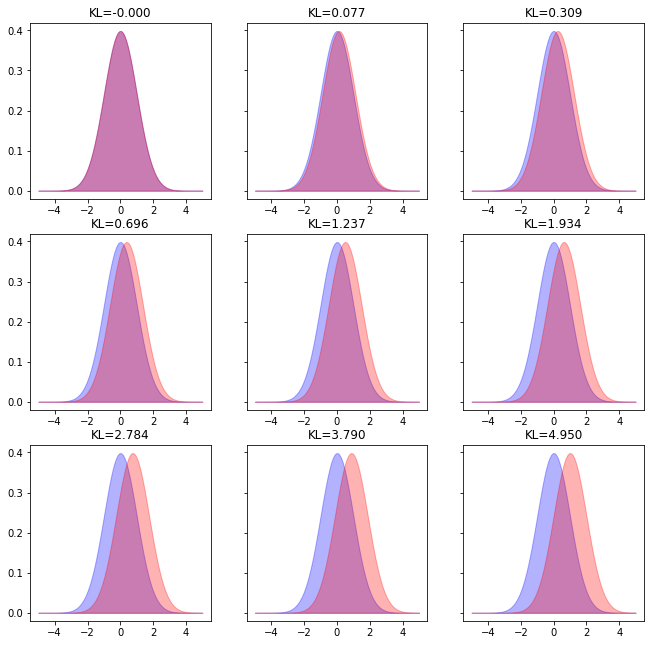

In [2]:
def kldiv(p, q):
    """
    p, qを離散確率分布とみなして、簡易的にKLダイバージェンスを求める
    """
    return - np.sum(p*np.log(q/p))


# x軸の値の配列
x =  np.linspace(-5, 5, 100)

# グラフの設定
fig, axes = plt.subplots(3, 3, figsize=(11, 11), sharey=True)

# q(x)の正規分布の平均値
q_locs = np.linspace(0, 1.0, 9).reshape(3, 3)

# p(x)の分布
px = norm.pdf(x, loc=0., scale=1.0)

# 塗りつぶしグラフを描くときの下限設定
bottom = np.zeros_like(x)

# 9種類のグラフを描画する
for i in range(3):
    for j in range(3):
        
        # q(x)の分布を生成する
        q_loc = q_locs[i, j]
        qx = norm(loc=q_loc, scale=1.0).pdf(x)

        # グラフ
        ax_ij = axes[i, j]
        ax_ij.fill_between(x, px, bottom, color='b', alpha=0.3)
        ax_ij.fill_between(x, qx, bottom, color='r', alpha=0.3)

        # KL ダイバージェンスを算出
        kl = kldiv(px, qx)
        
        title = 'KL={:>.3f}'.format(kl)
        ax_ij.set_title(title)

plt.show()